#BiLSTM with CNN

#1. Install and Import Dependincies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/Reviews.xlsx',encoding='cp1252')
data.head()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 663: character maps to <undefined>

#Cleaning Text

In [ ]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
lines=[]

r = str(data['reviewText'])

for i,line in enumerate(r):
  for ele in line:
    if ele in string.punctuation:
      line=line.replace(ele,'')
  lines.append(line)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def new_dataset(data,target):
  lines_=pd.DataFrame(data=data)
  new_data=[lines_,target]
  concat=pd.concat(new_data,axis=1)
  return concat

In [ ]:
new_data=new_dataset(lines,data['rating'])
new_data

,0,rating
0,0,4.0
1,,4.0
2,,4.0
3,,5.0
4,,4.0
...,...,...
655,b,NaN
656,j,NaN
657,e,NaN
658,c,NaN


In [ ]:
new_data[0]=new_data[0].astype('string')

def get_metrics(y_test, y_pred_proba):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred_proba >= 0.5), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred_proba >= 0.5, average = "macro"), 4))
    print('ROC_AUC_SCORE: ', round(roc_auc_score(y_test, y_pred_proba), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred_proba >= 0.5),'\n')

In [ ]:
new_data

,0,rating
0,0,4.0
1,,4.0
2,,4.0
3,,5.0
4,,4.0
...,...,...
655,b,NaN
656,j,NaN
657,e,NaN
658,c,NaN


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       660 non-null    string 
 1   rating  100 non-null    float64
dtypes: float64(1), string(1)
memory usage: 10.4 KB


In [ ]:
import nltk
new_lines=[]
for line in new_data[0]:
  lines=nltk.tokenize.sent_tokenize
  new_lines.append(lines)

#Tokenization and Padding the sequence input

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
new_list=[]

nltk.download('punkt')
from keras.preprocessing.text import Tokenizer
def sequence_data_dataset(data,n):
  # for str_ in data[0]:

  # tokens=nltk.word_tokenize(data)
  # sents=nltk.sent_tokenize(data)
  tokenize=Tokenizer(num_words=5000)
  # if len(tokens)<n:
  # for i in range(0,len(sents),1):
  tokenize.fit_on_texts(data)
  tokens_=tokenize.texts_to_sequences(data)
  tokens_=pad_sequences(tokens_,padding='post',maxlen=n)

  return tokens_,tokenize
#   concat=[pd.DataFrame(data=new_list),data['sentiment']]
#   return pd.concat(concat,axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
new_dataset,tokenize=sequence_data_dataset(new_data[0],7)
new_dataset
new_dataset.shape

(660, 7)

In [ ]:
new_dataset

array([[23,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [10,  0,  0, ...,  0,  0,  0],
       [ 3,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [ ]:
X=new_dataset
# Y=new_data['sentiment']
Y = pd.get_dummies(new_data['rating'])

#splitting the Dataset(New) into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=0)

In [ ]:
x_train.shape

(475, 7)

In [ ]:
y_train.shape

(475, 4)

#Bidirectional-LSTM With CNN






In [ ]:
model1 = keras.Sequential([
    keras.layers.Embedding(6000, 15, input_length=7),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='softmax') #change value accorind to y train value like 3 or 4 or 5
])

# compiles model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model1.summary()

num_epochs = 30
history1 = model1.fit(x_train,y_train, epochs=num_epochs, batch_size = 128, verbose=1, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7, 15)             90000     
                                                                 
 bidirectional (Bidirection  (None, 128)               40960     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 131476 (513.58 KB)
Trainable params: 131476 (513.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
3/3 [==============================] - 6s 779ms/step - loss: 0.1932 - a

In [ ]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


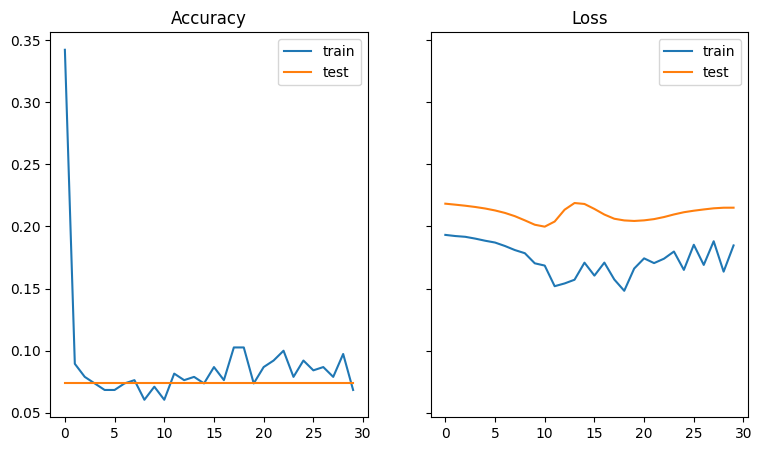

<Figure size 800x1000 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(1,2,sharey=True,figsize=(9,5))
fig=plt.figure(figsize=(8,10))

ax[0].plot(pd.DataFrame(history1.history['accuracy']))
ax[0].plot(pd.DataFrame(history1.history['val_accuracy']))
ax[0].set_title('Accuracy')
ax[0].legend(['train','test'])

ax[1].plot(pd.DataFrame(history1.history['loss']))
ax[1].plot(pd.DataFrame(history1.history['val_loss']))
ax[1].set_title('Loss')
ax[1].legend(['train','test'])

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
# from tf.keras.optimizers import SGD
# from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=30
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

# sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=7))
model.add(Dropout(0.4))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax')) #change value accorind to y train value like 3 or 4 or 5
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history = model.fit( x_train, y_train,batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 7, 32)             160000    
                                                                 
 dropout_1 (Dropout)         (None, 7, 32)             0         
                                                                 
 conv1d (Conv1D)             (None, 7, 32)             3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 32)             0         
 D)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 3, 32)             0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


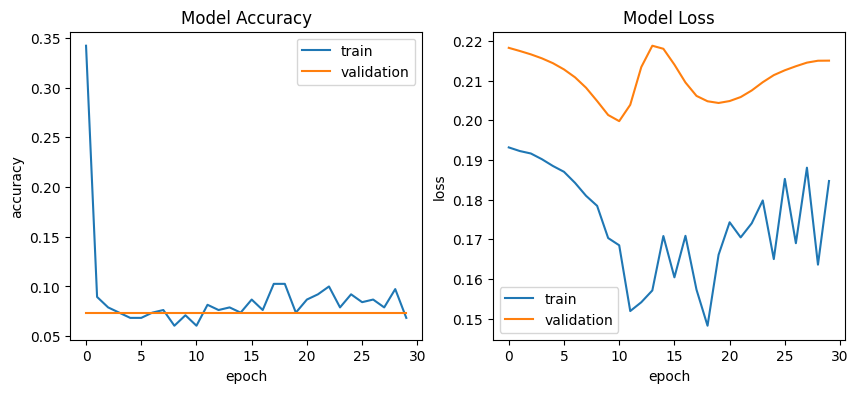

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    # Plot accuracy and validation accuracy
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')

    # Plot loss and validation loss
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

# Assuming history1 contains training history
plot_training_hist(history1)


#Prediction

In [ ]:
def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=7

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenize.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

#Confusion Matrix

2/2 [==============================] - 0s 8ms/step


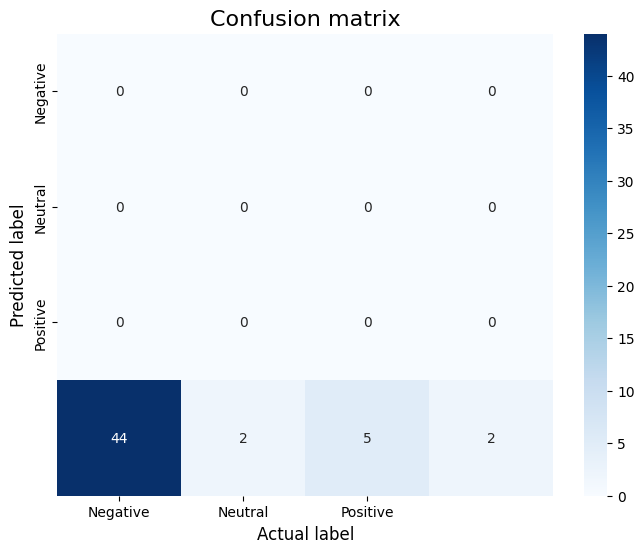

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(x_test,y_test):
  sentiment_classes = ['Negative', 'Neutral', 'Positive']
  y_pred=model.predict(x_test)
  cm=confusion_matrix(np.argmax(y_pred,axis=1),np.argmax(np.array(y_test),axis=1))
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
  plt.title('Confusion matrix', fontsize=16)
  plt.xlabel('Actual label', fontsize=12)
  plt.ylabel('Predicted label', fontsize=12)
  # # print(np.argmax(y_pred,axis=1))
  # print(sentiment[np.argmax(y_pred,axis=1)])
plot_confusion_matrix(x_val,y_val)